# Explorando datos de Pokémon con Pandas

![](http://pre02.deviantart.net/b8ea/th/pre/f/2011/201/c/2/c29adebe114379d32e11919f7ed86224-d412swy.jpg)

# Importar librerías

In [3]:
!pip install pandas

    100% |████████████████████████████████| 11.6MB 70kB/s 
    100% |████████████████████████████████| 481kB 1.1MB/s 
    100% |████████████████████████████████| 194kB 1.0MB/s 
    100% |████████████████████████████████| 3.9MB 191kB/s 


In [4]:
import pandas as pd

# Cargar datos para crear un DataFrame

In [9]:
data = pd.read_csv('Pokemon.csv', index_col='#')

## La unidad canónica de pandas es el DataFrame, que se parece a un spreadsheet en Excel. Tiene filas y columnas nombradas. Es muy fácil e intuitivo manipular.

# Echar un vistazo a las primeras filas

In [10]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Trabajando con un Pandas "Series"

In [13]:
type(data["Name"])

pandas.core.series.Series

### Acceder a ciertas columnas o filas

In [15]:
(data.Name == data["Name"]).all()

True

## Un pandas "Series" es lo que le decimos a una columna de un DataFrame. Se exponen varios métodos ahí mismo, que hace que sea muy fácil preguntar cosas de él.

### ¿Cuál es el "total" más grande?

In [18]:
data.Total.max()

780

### ¿Quién tiene el total más grande?

In [25]:
total_mas_grande = data.Total.max()

In [34]:
data[data.Total == total_mas_grande].Name

#
150      MewtwoMega Mewtwo X
150      MewtwoMega Mewtwo Y
384    RayquazaMega Rayquaza
Name: Name, dtype: object

### ¿Cuál es el "Speed" promedio?

In [40]:
data.Speed.mean()

68.277500000000003

### ¿Cómo son los valores del estadístico "Attack"?

In [48]:
%matplotlib inline

#### Pandas nos permite hacer muchas visualizaciones desde el Series o DataFrame mismo, haciéndolo muy fácil obtener una vista ancha de la forma de tus datos.

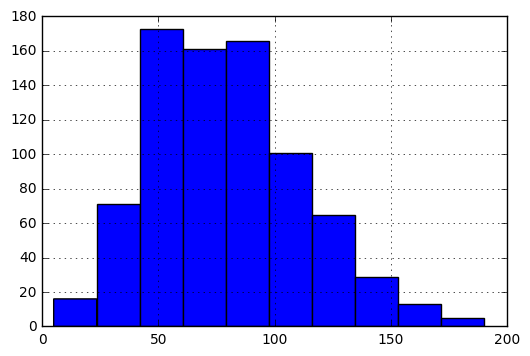

In [50]:
data.Attack.hist()

### Solo para estar seguro..

In [51]:
data.Attack.min()

5

In [52]:
data.Attack.max()

190

### Cuantos de cada "Type 1" y "Type 2" tenemos?

In [57]:
data['Type 1'].value_counts()

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

# "Aggregation"

## ¿Cuál es el "Total" promedio de cada Pokémon de "Type 1" y "Type 2"?

In [66]:
data.groupby('Type 1').Total.mean().sort_values(ascending=False)

Type 1
Dragon      550.531250
Steel       487.703704
Flying      485.000000
Psychic     475.947368
Fire        458.076923
Rock        453.750000
Dark        445.741935
Electric    443.409091
Ghost       439.562500
Ground      437.500000
Ice         433.458333
Water       430.455357
Grass       421.142857
Fighting    416.444444
Fairy       413.176471
Normal      401.683673
Poison      399.142857
Bug         378.927536
Name: Total, dtype: float64

In [67]:
data.groupby('Type 2').Total.mean().sort_values(ascending=False)

Type 2
Dragon      526.166667
Fighting    525.846154
Ice         525.714286
Fire        506.250000
Steel       485.227273
Dark        484.400000
Psychic     479.060606
Electric    455.333333
Flying      452.546392
Ground      444.342857
Rock        434.642857
Ghost       430.714286
Water       418.214286
Fairy       417.956522
Normal      411.500000
Grass       408.920000
Poison      396.500000
Bug         393.333333
Name: Total, dtype: float64

## ¿Cuál es el "Attack" máximo de cada combinación de "Type 1" y "Type 2"?

In [74]:
data.groupby(['Type 1', 'Type 2']).Attack.max().sort_values(ascending=False)

Type 1    Type 2  
Psychic   Fighting    190
Bug       Fighting    185
Ground    Fire        180
Dragon    Flying      180
          Ice         170
          Ground      170
Rock      Dark        164
Fire      Fighting    160
Rock      Fairy       160
Psychic   Dark        160
Water     Dark        155
Bug       Flying      155
          Poison      150
Dragon    Electric    150
Steel     Ghost       150
Water     Ground      150
Bug       Steel       150
Fighting  Steel       145
Steel     Psychic     145
Ground    Flying      145
Rock      Flying      140
Ground    Rock        140
Normal    Fighting    136
Ground    Steel       135
Grass     Ice         132
Dark      Flying      131
Fire      Flying      130
Ice       Ground      130
Dragon    Psychic     130
Grass     Fighting    130
                     ... 
Poison    Dragon       75
Electric  Steel        70
Water     Grass        70
Ground    Psychic      70
Flying    Dragon       70
Normal    Fairy        70
Fire      Psychic  

# Visualizar con seaborn

In [79]:
import seaborn as sns

## Visualizar una columna contra otra

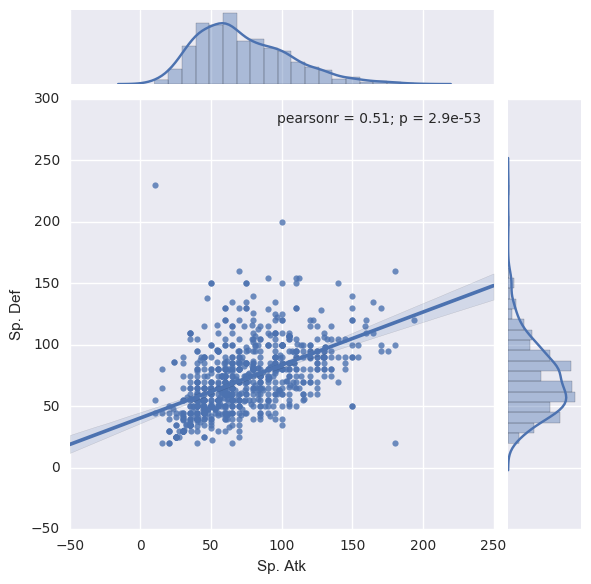

In [83]:
sns.jointplot(x="Sp. Atk", y="Sp. Def", data=data, kind="reg")

In [75]:
data.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


## Crear un boxplot de las columnas que nos importan

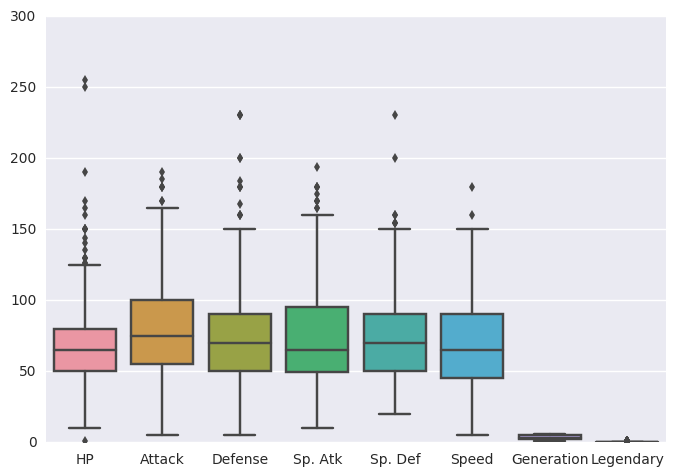

In [86]:
sns.boxplot( data = data.drop(['Name', 'Total'], axis=1))